In [1]:
import os
import sys
import logging
import copy

sys.path.append("../")
adaptive_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if adaptive_root not in sys.path:
    sys.path.append(adaptive_root)
data_dir = os.path.join(adaptive_root, "notebooks", "fake_data")

from simulation import fitters, simulators, utils, estimators

logger = logging.getLogger("cmdstanpy")
logger.addHandler(logging.NullHandler())
logger.propagate = False
logger.setLevel(logging.CRITICAL)

In [6]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

In [ ]:
sim = utils.CHICK_SIMULATOR
sim.n = np.array([utils.CHICK_N])
sim.p = np.array([0.5])
J = 1000
num_reps = 100

sigma_b_mom = {}

for j in tqdm(range(2, J)):
    estimates = []
    for rep in range(num_reps):
        sim.n = np.array([utils.CHICK_N] * j)
        sim.p = np.array([0.5] * j)

        estimate = utils.sigma_b_mom(sim.simulate())
        estimates.append(estimate)

    mean_estimate = np.mean(np.array(estimates))
    sigma_b_mom[j] = mean_estimate

  0%|          | 0/998 [00:00<?, ?it/s]

In [ ]:
import plotly.express as px

# Extract data for plotting
sigma_b_mom_df = pd.DataFrame(
    {"j": list(sigma_b_mom.keys()), "mean_estimate": list(sigma_b_mom.values())}
)

# Create the plot
fig = px.line(
    sigma_b_mom_df,
    x="j",
    y="mean_estimate",
    title="Estimated sigma_b using method of moments estimator",
    labels={"j": "Experiment Index", "mean_estimate": "Mean estimated sigma_b"},
)

# Add a horizontal line at sim.sigma_b
fig.add_hline(
    y=sim.sigma_b,
    line_dash="dash",
    line_color="red",
    annotation_text="sim.sigma_b",
    annotation_position="bottom right",
)

# Show the plot
fig.show()

In [ ]:
sim = utils.CHICK_SIMULATOR
sim.n = np.array([utils.CHICK_N])
sim.p = np.array([0.5])
J = 100
num_reps = 10

sigma_b_posterior = {}
fitter = fitters.FitterFlatHyperpriors()

for j in tqdm(range(2, J, 10), desc="j"):
    estimates = []
    for rep in tqdm(range(num_reps), desc="reps", leave=False):
        sim.n = np.array([utils.CHICK_N] * j)
        sim.p = np.array([0.5] * j)

        data = sim.simulate()
        sampler = fitter.fit(data, show_progress=False)
        estimate = np.mean(sampler.sigma_b)

        estimates.append(estimate)

    mean_estimate = np.mean(np.array(estimates))
    sigma_b_posterior[j] = mean_estimate

j:   0%|          | 0/10 [00:00<?, ?it/s]

reps:   0%|          | 0/10 [00:00<?, ?it/s]

reps:   0%|          | 0/10 [00:00<?, ?it/s]

reps:   0%|          | 0/10 [00:00<?, ?it/s]

reps:   0%|          | 0/10 [00:00<?, ?it/s]

reps:   0%|          | 0/10 [00:00<?, ?it/s]

reps:   0%|          | 0/10 [00:00<?, ?it/s]

reps:   0%|          | 0/10 [00:00<?, ?it/s]

reps:   0%|          | 0/10 [00:00<?, ?it/s]

reps:   0%|          | 0/10 [00:00<?, ?it/s]

reps:   0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
# Extract data for plotting
sigma_b_posterior_df = pd.DataFrame(
    {
        "j": list(sigma_b_posterior.keys()),
        "mean_estimate": list(sigma_b_posterior.values()),
    }
)

# Create the plot
fig = px.line(
    sigma_b_posterior_df,
    x="j",
    y="mean_estimate",
    title="Estimated sigma_b using posterior mean",
    labels={"j": "Experiment Index", "mean_estimate": "Mean estimated sigma_b"},
)

# Add a horizontal line at sim.sigma_b
fig.add_hline(
    y=sim.sigma_b,
    line_dash="dash",
    line_color="red",
    annotation_text="sim.sigma_b",
    annotation_position="bottom right",
)

# Show the plot
fig.show()

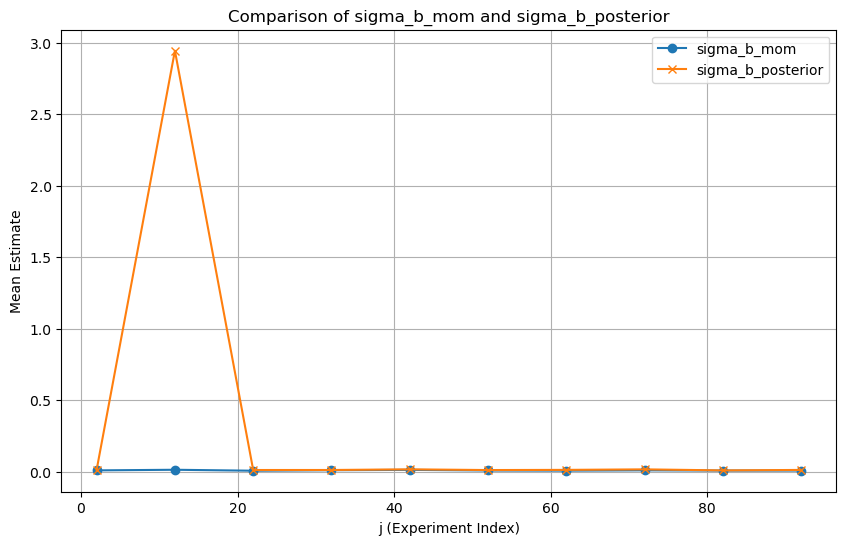

In [ ]:
import matplotlib.pyplot as plt

# Find common keys
common_keys = set(sigma_b_mom.keys()).intersection(sigma_b_posterior.keys())

# Extract values for common keys
mom_values = [sigma_b_mom[k] for k in common_keys]
posterior_values = [sigma_b_posterior[k] for k in common_keys]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sorted(common_keys), mom_values, label="sigma_b_mom", marker="o")
plt.plot(sorted(common_keys), posterior_values, label="sigma_b_posterior", marker="x")
plt.xlabel("j (Experiment Index)")
plt.ylabel("Mean Estimate")
plt.title("Comparison of sigma_b_mom and sigma_b_posterior")
plt.legend()
plt.grid()
plt.show()